# 🧭 Análisis de Datos con Pandas: Agrupación (groupby( )).

## Explorando el Dataset Mitológico

### Un buen cietifico de datos, no solo presenta resultados, sino que cuenta una historia. En este sentido , groupby() es una de las herramientas más fundamentales y potentes en Pandas para el análisis de datos. Nos permite agrupar filas de un Dataframe basándose en uno o más criterios, aplicar funciones de agregación (como la media, suma, conteo) a cada grupo y en esencia, transformar datos detallados en insights resumidos y significativos. Dominar groupby() es crucial para extraer valor de grandes volúmenes de información y para comunicar hallazgos de manera efectiva, lo cual es indispensable para la toma de decisiones estratégicas en cualquier contexto empresarial

#### Los puntos que veremos hoy serán:


1. Agrupar datos por categoría con groupby()

2. Aplicar estadísticas: media, suma, máximo, etc.

3. Transformaciones útiles (agg, transform)

4. Ejercicios creativos de práctica

* **Extra: cómo ordenar resultados**

# Presentamos el Dataset mitologico

## Crearemos un dataset mitologico a fin de poder realizar las agrupaciones y ejercicios

### La creación del dataframe ya lo vimos, se crea un diccionario en python y lugo se convierte en dataframe con Pandas

In [2]:
import pandas as pd

datos = [
    {"nombre": "Zeus", "mitologia": "Griega", "edad": 5000, "dominio": "Cielo", "nivel_poder": 95, "arma": "Rayo", "esta_activo": True},
    {"nombre": "Atenea", "mitologia": "Griega", "edad": 4800, "dominio": "Sabiduría", "nivel_poder": 89, "arma": "Lanza", "esta_activo": False},
    {"nombre": "Júpiter", "mitologia": "Romana", "edad": 4900, "dominio": "Cielo", "nivel_poder": 93, "arma": "Rayo", "esta_activo": True},
    {"nombre": "Marte", "mitologia": "Romana", "edad": 4500, "dominio": "Guerra", "nivel_poder": 85, "arma": "Espada", "esta_activo": True},
    {"nombre": "Ra", "mitologia": "Egipcia", "edad": 7000, "dominio": "Sol", "nivel_poder": 92, "arma": "Barco Solar", "esta_activo": False},
    {"nombre": "Anubis", "mitologia": "Egipcia", "edad": 6500, "dominio": "Muerte", "nivel_poder": 87, "arma": "Cetro", "esta_activo": True},
    {"nombre": "Thor", "mitologia": "Nórdica", "edad": 3500, "dominio": "Trueno", "nivel_poder": 90, "arma": "Mjölnir", "esta_activo": True},
    {"nombre": "Odin", "mitologia": "Nórdica", "edad": 6000, "dominio": "Sabiduría", "nivel_poder": 94, "arma": "Lanza", "esta_activo": False},
    {"nombre": "Shiva", "mitologia": "Hindú", "edad": 8000, "dominio": "Destrucción", "nivel_poder": 96, "arma": "Tridente", "esta_activo": True},
    {"nombre": "Vishnu", "mitologia": "Hindú", "edad": 7900, "dominio": "Protección", "nivel_poder": 93, "arma": "Disco", "esta_activo": True},
    {"nombre": "Quetzalcóatl", "mitologia": "Azteca", "edad": 4000, "dominio": "Viento", "nivel_poder": 88, "arma": "Serpiente", "esta_activo": True},
    {"nombre": "Amaterasu", "mitologia": "Japonesa", "edad": 6000, "dominio": "Sol", "nivel_poder": 91, "arma": "Espada", "esta_activo": False}
]

df = pd.DataFrame(datos)
df


,nombre,mitologia,edad,dominio,nivel_poder,arma,esta_activo
0,Zeus,Griega,5000,Cielo,95,Rayo,True
1,Atenea,Griega,4800,Sabiduría,89,Lanza,False
2,Júpiter,Romana,4900,Cielo,93,Rayo,True
3,Marte,Romana,4500,Guerra,85,Espada,True
4,Ra,Egipcia,7000,Sol,92,Barco Solar,False
5,Anubis,Egipcia,6500,Muerte,87,Cetro,True
6,Thor,Nórdica,3500,Trueno,90,Mjölnir,True
7,Odin,Nórdica,6000,Sabiduría,94,Lanza,False
8,Shiva,Hindú,8000,Destrucción,96,Tridente,True
9,Vishnu,Hindú,7900,Protección,93,Disco,True


### Ahora lo que vendria seria una exploración inicial con `.info()`, `.head()`, `.describe()`... pero como el tema del notebook es el de aprender agruapaciones. Nos centraremos en eso

## 🌀 PARTE 1 — Agrupación simple:
### ¿Cuántas deidades hay por mitología?


### groupby("mitologia"): agrupa el DataFrame por la columna "mitologia".

### .size( ): cuenta cuántas filas hay en cada grupo (es decir, cuántas deidades).

In [3]:
df.groupby("mitologia").size()

,0
mitologia,
Azteca,1
Egipcia,2
Griega,2
Hindú,2
Japonesa,1
Nórdica,2
Romana,2


#### En el anterior resultados, podemos observar que las deidades más frecuentes en el DataFrame son las que se encuentran en la mitologia egipcia, griega, hindú, nórdica y romana.

### 🎨 Ejercicio:

* ¿Cuántos dioses hay por dominio?

* ¿Cuántos están activos por mitología?

In [4]:
df.groupby("dominio").size()  # deidades por dominio

,0
dominio,
Cielo,2
Destrucción,1
Guerra,1
Muerte,1
Protección,1
Sabiduría,2
Sol,2
Trueno,1
Viento,1


#### Podemos observar que los dominios que poseen mas deidades son: cielo, sabiduría y sol

In [5]:
df[df["esta_activo"]].groupby("mitologia").size()  # cuantos estan activos

,0
mitologia,
Azteca,1
Egipcia,1
Griega,1
Hindú,2
Nórdica,1
Romana,2


#### Al comparar la actividad de las deidades por mitologia, observamos que las más activas son las hindúes y las romanas

In [6]:
# Otra forma de mirar las deidades activas

df.groupby("mitologia")["esta_activo"].sum()

,esta_activo
mitologia,
Azteca,1
Egipcia,1
Griega,1
Hindú,2
Japonesa,0
Nórdica,1
Romana,2


#### Con esta otra forma que lo que hace es sumar los activos por mitologia, en este caso concreto, vemoa que las hindues y romanas son las más activas y que luego hay mitologias como la japonesa que no tienen ninguno activo

## 🌀 PARTE 2 — Estadísticas por grupo:
### Edad media por mitología

* ["edad"] selecciona la columna a la que aplicar la media.

* .mean( ) calcula el promedio de edad por grupo.

In [7]:
df.groupby("mitologia")["edad"].mean()

,edad
mitologia,
Azteca,4000.0
Egipcia,6750.0
Griega,4900.0
Hindú,7950.0
Japonesa,6000.0
Nórdica,4750.0
Romana,4700.0


#### Parece ser que las deidades más antiguas son las nordicas, romanas e hindues y las deidades más jóvenes se encuentran en la azteca

In [8]:
# Nivel de poder promedio por mitologia
df.groupby("mitologia")["nivel_poder"].mean()

,nivel_poder
mitologia,
Azteca,88.0
Egipcia,89.5
Griega,92.0
Hindú,94.5
Japonesa,91.0
Nórdica,92.0
Romana,89.0


#### La mitologia más poderosa es l hindú, y la que menos la azteca

In [9]:
# Edad máxima por mitologia

df.groupby("mitologia")["edad"].max()

,edad
mitologia,
Azteca,4000
Egipcia,7000
Griega,5000
Hindú,8000
Japonesa,6000
Nórdica,6000
Romana,4900


#### Al buscar las mitologicas con deidades mas antiguas nos encontramos que entre ellas se encuentran la hindú, la egipcia, japonesa y nordica

In [10]:
# Edad minima por dominio

df.groupby("dominio")["edad"].min()

,edad
dominio,
Cielo,4900
Destrucción,8000
Guerra,4500
Muerte,6500
Protección,7900
Sabiduría,4800
Sol,6000
Trueno,3500
Viento,4000


#### Al agrupar edades por dominio pero buscando el minimo de edad por dominio, observamos que los dominios con deidades con menos edad son de menor a mayor:

+ Trueno
+ Viento
+ Guerra
+ Sabiduria
+ Cielo
+ Sol
+ Muerte
+ Protección
+ Destrucción

### ✏️ Ejercicios para ti:

* ¿Cuál es el nivel de poder promedio por dominio?

* ¿Cuál es la edad máxima por mitología?

* ¿Qué mitología tiene el dios más joven?

In [11]:
# Nivel de poder promedio por dominio

df.groupby("dominio")["nivel_poder"].mean()

,nivel_poder
dominio,
Cielo,94.0
Destrucción,96.0
Guerra,85.0
Muerte,87.0
Protección,93.0
Sabiduría,91.5
Sol,91.5
Trueno,90.0
Viento,88.0


#### El dominio con mayor poder es el del cielo

In [12]:
# edad maxima por mitología

df.groupby("mitologia")["edad"].max()

,edad
mitologia,
Azteca,4000
Egipcia,7000
Griega,5000
Hindú,8000
Japonesa,6000
Nórdica,6000
Romana,4900


#### la deidad con más edad se encuentra en la mitologia hindú

In [13]:
# edad minima por mitologia

df.groupby("mitologia")["edad"].min()

,edad
mitologia,
Azteca,4000
Egipcia,6500
Griega,4800
Hindú,7900
Japonesa,6000
Nórdica,3500
Romana,4500


#### La deidad con una edad menor a todas las demás es la azteca con una edad de 4000 años

## 🌀 PARTE 3 — Múltiples estadísticas a la vez con .agg()
### Lo siguiente te da una tabla resumen con:

* mean: edad media

* min: edad mínima

* max: edad máxima

* count: cantidad de dioses

In [14]:
df.groupby("mitologia")["edad"].agg(["mean", "min", "max", "count"])

,mean,min,max,count
mitologia,,,,
Azteca,4000.0,4000,4000,1
Egipcia,6750.0,6500,7000,2
Griega,4900.0,4800,5000,2
Hindú,7950.0,7900,8000,2
Japonesa,6000.0,6000,6000,1
Nórdica,4750.0,3500,6000,2
Romana,4700.0,4500,4900,2


#### Aqui disponemos de unas estadisticas basicas por edad y mitologia que nos da una idea general de los datos que disponemos

In [15]:
# Ejemplo más pro

df.groupby("mitologia")[["edad", "nivel_poder"]].agg({
    "edad": ["mean", "max"],
    "nivel_poder": ["mean", "min"]
    })

edad       nivel_poder    
             mean   max        mean min
mitologia                              
Azteca     4000.0  4000        88.0  88
Egipcia    6750.0  7000        89.5  87
Griega     4900.0  5000        92.0  89
Hindú      7950.0  8000        94.5  93
Japonesa   6000.0  6000        91.0  91
Nórdica    4750.0  6000        92.0  90
Romana     4700.0  4900        89.0  85

#### Aqui en concreto, los grupos realizados por mitologia los clasificamos a su vez por edad y nivel de poder, sacando estadisticas diferentes y ajustadas a cada dato, por separado.

## 🌀 PARTE 4 — Ordenar resultados
###  Esto responde:
#### ¿Qué mitología tiene los dioses más poderosos en promedio?


In [16]:
df.groupby("mitologia")["nivel_poder"].mean().sort_values(ascending=False)

,nivel_poder
mitologia,
Hindú,94.5
Nórdica,92.0
Griega,92.0
Japonesa,91.0
Egipcia,89.5
Romana,89.0
Azteca,88.0


#### Ordenamos los dioses por mitologia y nivel de poder, al ordenarlo. los de más arriba son los más poderosos. parece ser que los hindúes ganan esta partida.

### ✏️ Ejercicio:

* ¿Cuál es el dominio más común?

In [17]:
df.groupby("dominio").size().sort_values(ascending=False)

,0
dominio,
Cielo,2
Sol,2
Sabiduría,2
Destrucción,1
Guerra,1
Protección,1
Muerte,1
Trueno,1
Viento,1


## 🌀 PARTE 5 — Agrupamiento creativo:
 ### ¿Quién es el dios más anciano por mitología?
### 💎 Técnica avanzada con groupby() + idxmax():

* groupby(...).idxmax() devuelve el índice de los dioses más viejos por mitología.

* df.loc[...] selecciona esos dioses.



In [18]:
idx = df.groupby("mitologia")["edad"].idxmax()
df.loc[idx, ["mitologia", "nombre", "edad"]]

,mitologia,nombre,edad
10,Azteca,Quetzalcóatl,4000
4,Egipcia,Ra,7000
0,Griega,Zeus,5000
8,Hindú,Shiva,8000
11,Japonesa,Amaterasu,6000
7,Nórdica,Odin,6000
2,Romana,Júpiter,4900


### ✏️ Ejercicio para ti:

* ¿Cuál es el dios más poderoso por mitología?

* ¿Qué dioses activos son los más viejos por grupo?

In [19]:
# dios más poderoso por mitologia

idx = df.groupby("mitologia")["nivel_poder"].idxmax()
df.loc[idx, ["mitologia", "nombre", "nivel_poder"]]

,mitologia,nombre,nivel_poder
10,Azteca,Quetzalcóatl,88
4,Egipcia,Ra,92
0,Griega,Zeus,95
8,Hindú,Shiva,96
11,Japonesa,Amaterasu,91
7,Nórdica,Odin,94
2,Romana,Júpiter,93


In [20]:
# dioses activos mas viejos por dominio, lo he ordenado de mayor a menor

idx = df.groupby("dominio")["edad"].idxmax()
df.loc[idx, ["nombre", "dominio", "edad"]].sort_values(by="edad", ascending=False)

,nombre,dominio,edad
8,Shiva,Destrucción,8000
9,Vishnu,Protección,7900
4,Ra,Sol,7000
5,Anubis,Muerte,6500
7,Odin,Sabiduría,6000
0,Zeus,Cielo,5000
3,Marte,Guerra,4500
10,Quetzalcóatl,Viento,4000
6,Thor,Trueno,3500


# 🧠 RECAPITULACIÓN VISUAL

* groupby("col")	Agrupa filas por valores únicos

* .size()	Cuenta cuántas filas por grupo

* .mean(), .max(), .min()	Estadísticas simples

* .agg({...})	Estadísticas múltiples a la vez

* .sort_values()	Ordenar resultados

* groupby(...).idxmax() + .loc[]
Elegir la fila con el valor más alto

 ## EJERCICIOS — Agrupamiento y Estadísticas

### 🥉 EJERCICIO 1 — ¿Cuántos dioses activos hay por mitología?

In [21]:
df.groupby("mitologia")["esta_activo"].sum()

,esta_activo
mitologia,
Azteca,1
Egipcia,1
Griega,1
Hindú,2
Japonesa,0
Nórdica,1
Romana,2


In [22]:
# bonus: si quisiera contar tambien los no activos

df.groupby("mitologia")["esta_activo"].agg(
    activos='sum', inactivos=lambda x: (~x).sum()
)


,activos,inactivos
mitologia,,
Azteca,1,0
Egipcia,1,1
Griega,1,1
Hindú,2,0
Japonesa,0,1
Nórdica,1,1
Romana,2,0


### 🥈 EJERCICIO 2 — ¿Cuál es la edad media por mitología?

#### 💡 Usa .groupby("mitologia")["edad"].mean()

🔁 Luego intenta ordenarlo para ver quién tiene los más viejos.

In [23]:
df.groupby("mitologia")["edad"].mean().sort_values(ascending=False)

,edad
mitologia,
Hindú,7950.0
Egipcia,6750.0
Japonesa,6000.0
Griega,4900.0
Nórdica,4750.0
Romana,4700.0
Azteca,4000.0


### 🥉 EJERCICIO 3 — ¿Cuál es el nivel de poder promedio por dominio?

#### 💡 Agrupa por "dominio" y calcula el promedio de "nivel_poder".

In [24]:
df.groupby("dominio")["nivel_poder"].mean().sort_values(ascending=False)

,nivel_poder
dominio,
Destrucción,96.0
Cielo,94.0
Protección,93.0
Sol,91.5
Sabiduría,91.5
Trueno,90.0
Viento,88.0
Muerte,87.0
Guerra,85.0


### 🥇 EJERCICIO 4 — ¿Qué mitología tiene el dios más poderoso?

#### 💡 Usa idxmax() sobre "nivel_poder", luego usa .loc[] para ver el dios.

In [25]:
idx = df["nivel_poder"].idxmax()
df.loc[idx, ["nombre", "mitologia", "nivel_poder"]]

,8
nombre,Shiva
mitologia,Hindú
nivel_poder,96


In [26]:
# si quiero que me de los mayores poderes por mitologia y luego ordenarlo
idx = df.groupby("mitologia")["nivel_poder"].idxmax()
df.loc[idx, ["nombre", "mitologia", "nivel_poder"]].sort_values(by="nivel_poder", ascending=False)



,nombre,mitologia,nivel_poder
8,Shiva,Hindú,96
0,Zeus,Griega,95
7,Odin,Nórdica,94
2,Júpiter,Romana,93
4,Ra,Egipcia,92
11,Amaterasu,Japonesa,91
10,Quetzalcóatl,Azteca,88


### 🥇 EJERCICIO 5 — ¿Quién es el dios más anciano activo de cada mitología?

In [27]:
activo = df[df["esta_activo"]] # filtra el dataframe completo de los activos
viejo = activo.groupby("mitologia")["edad"].idxmax() # en ese dataframe de activos busca y agrupa los indices de los mas viejos por mitologia
df.loc[viejo, ["nombre", "mitologia", "edad"]] # selecciona las filas correspondientes a los indices

,nombre,mitologia,edad
10,Quetzalcóatl,Azteca,4000
5,Anubis,Egipcia,6500
0,Zeus,Griega,5000
8,Shiva,Hindú,8000
6,Thor,Nórdica,3500
2,Júpiter,Romana,4900


###  ¿Qué dominio tiene el mayor nivel de poder promedio?

In [28]:
df.groupby("dominio")["nivel_poder"].mean().sort_values(ascending=False)

,nivel_poder
dominio,
Destrucción,96.0
Cielo,94.0
Protección,93.0
Sol,91.5
Sabiduría,91.5
Trueno,90.0
Viento,88.0
Muerte,87.0
Guerra,85.0


### 🔮 SUPER BONUS (Pro) — Agrupa por mitología y muestra:
* Edad media

* Nivel de poder mínimo

* Cantidad de dioses activos

**💡 Usa .agg() combinando funciones y filtrando si hace falta.**

In [29]:
df.groupby("mitologia")[["edad", "nivel_poder", "esta_activo"]].agg({
    "edad": ["mean"],
    "nivel_poder": ["min"],
    "esta_activo": ["sum"]
}).sort_values(by=("esta_activo", "sum"), ascending=False)

,edad,nivel_poder,esta_activo
,mean,min,sum
mitologia,,,
Hindú,7950.0,93,2
Romana,4700.0,85,2
Azteca,4000.0,88,1
Griega,4900.0,89,1
Egipcia,6750.0,87,1
Nórdica,4750.0,90,1
Japonesa,6000.0,91,0


In [30]:
# forma mas compacta de hacerlo

df.groupby("mitologia").agg({
    "edad": "mean",
    "nivel_poder": "min",
    "esta_activo": "sum"
}).sort_values(by="esta_activo", ascending=False)


,edad,nivel_poder,esta_activo
mitologia,,,
Hindú,7950.0,93,2
Romana,4700.0,85,2
Azteca,4000.0,88,1
Griega,4900.0,89,1
Egipcia,6750.0,87,1
Nórdica,4750.0,90,1
Japonesa,6000.0,91,0


## 1. Transformaciones creativas con groupby().transform()
### ¿Qué es .transform()?
#### Aplica una función a cada grupo y devuelve un resultado con el mismo tamaño que el DataFrame original.

#### Útil para crear columnas nuevas con valores calculados en contexto del grupo.



#### Ejemplo rápido
* Supongamos que quieres saber la edad normalizada dentro de cada mitología, para comparar edades relativo a su grupo:

In [31]:
df["edad_normalizada"] = df.groupby("mitologia")["edad"].transform(lambda x: (x- x.mean())/x.std())
df[["nombre", "mitologia", "edad", "edad_normalizada"]]

,nombre,mitologia,edad,edad_normalizada
0,Zeus,Griega,5000,0.707107
1,Atenea,Griega,4800,-0.707107
2,Júpiter,Romana,4900,0.707107
3,Marte,Romana,4500,-0.707107
4,Ra,Egipcia,7000,0.707107
5,Anubis,Egipcia,6500,-0.707107
6,Thor,Nórdica,3500,-0.707107
7,Odin,Nórdica,6000,0.707107
8,Shiva,Hindú,8000,0.707107
9,Vishnu,Hindú,7900,-0.707107


### ¿Qué pasa aquí?

* Dentro de cada grupo de mitología, calculamos la media y la desviación estándar de la edad.

* A cada edad le restamos la media y dividimos por la desviación estándar.

* El resultado es una nueva columna con valores comparables dentro del grupo.

## 2. Combinar estadísticas con .agg()
### Podemos calcular varias estadísticas en una sola operación:

In [32]:
estadisticas = df.groupby("mitologia")[["edad", "nivel_poder"]].agg(['mean', 'max', 'min', 'count'])
estadisticas

edad                   nivel_poder              
             mean   max   min count        mean max min count
mitologia                                                    
Azteca     4000.0  4000  4000     1        88.0  88  88     1
Egipcia    6750.0  7000  6500     2        89.5  92  87     2
Griega     4900.0  5000  4800     2        92.0  95  89     2
Hindú      7950.0  8000  7900     2        94.5  96  93     2
Japonesa   6000.0  6000  6000     1        91.0  91  91     1
Nórdica    4750.0  6000  3500     2        92.0  94  90     2
Romana     4700.0  4900  4500     2        89.0  93  85     2

## 3. Ordenar resultados
### Si quieres ordenar las estadísticas calculadas, por ejemplo por edad media:

In [33]:
estadisticas = estadisticas.sort_values(("edad", "mean"), ascending=False)
estadisticas

edad                   nivel_poder              
             mean   max   min count        mean max min count
mitologia                                                    
Hindú      7950.0  8000  7900     2        94.5  96  93     2
Egipcia    6750.0  7000  6500     2        89.5  92  87     2
Japonesa   6000.0  6000  6000     1        91.0  91  91     1
Griega     4900.0  5000  4800     2        92.0  95  89     2
Nórdica    4750.0  6000  3500     2        92.0  94  90     2
Romana     4700.0  4900  4500     2        89.0  93  85     2
Azteca     4000.0  4000  4000     1        88.0  88  88     1

## 4. Visualización rápida
### Para ver, por ejemplo, la edad media por mitología en un gráfico de barras:

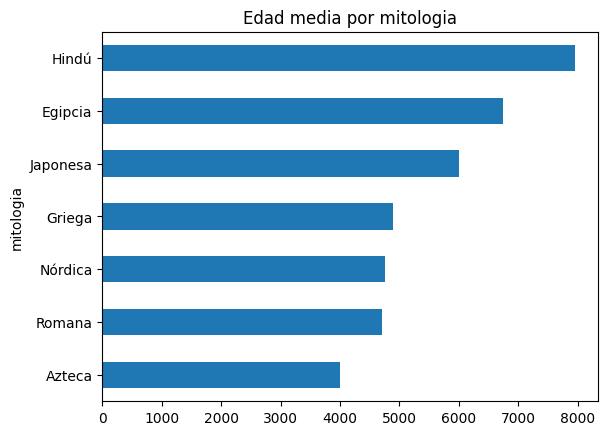

In [34]:
import matplotlib.pyplot as plt

edad_media = df.groupby("mitologia")["edad"].mean().sort_values()
edad_media.plot(kind="barh", title="Edad media por mitologia")
plt.show()

#### En la siguiente grafica vemos de forma mas clara y gráfica las deidades ordenadas por edad y agrupadas por mitologia